In [48]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from PIL import Image

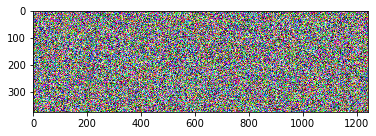

In [46]:
x = np.random.random((375, 1242, 3))
# x = np.zeros((16,16,3))

plt.imshow(x)

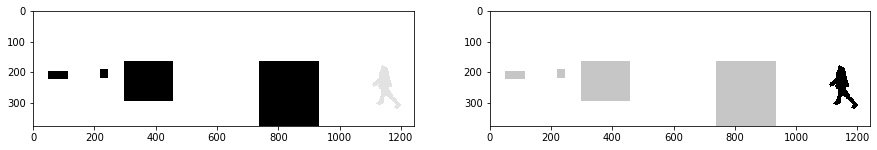

In [83]:
# https://www.vision.rwth-aachen.de/page/mots

# mask = np.random.randint(2, size=(16, 16))
mask_img = np.array(Image.open("/home/adam/Downloads/000000.png"))
mask_class = mask_img // 1000
mask_id = mask_img % 1000 + (mask_class != 0) # +1 for not background

_, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(mask_class, cmap="Greys")
ax[1].imshow(mask_id, cmap="Greys")

[0. 1. 0.]


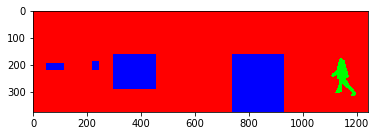

In [97]:
mask_class_onehot = split_channels(mask_class)

plt.imshow(mask_class_onehot)
print(mask_class_onehot[200,1150])

In [96]:
def split_channels(img):
    return np.stack([img == c for c in np.unique(img)], 2).astype(float)

In [67]:
def apply_mask(image, mask, color, alpha=0.5):
    """ Apply the given mask to the image.
    """
    channels = [np.where(
        mask == 1, 
        image[:, :, c] * (1 - alpha) + alpha * color[c], 
        image[:, :, c]
    ) for c in range(3)]
    
    return np.stack(channels, axis=2)

(375, 1242, 3)


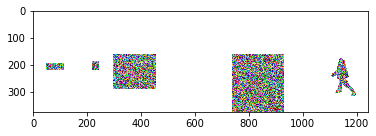

In [68]:
masked = apply_mask(x, mask, (1,1,1), 1)
print(masked.shape)
plt.imshow(masked)

In [69]:
mask[200, 1150], mask[300, 800], mask[0,0]

(False, False, True)